Итоговая работа по курсу «Python и математика для анализа данных»

Проектная работа по модулю “Математика и статистика в Python”
1. Загрузить файл hr.csv.
2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).
3. Рассчитать и визуализировать корреляционную матрицу для переменных.
4. Визуализировать несколько взаимосвязей между переменными.
5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными.
6. Рассчитать сколько работников работает в каждом департаменте.
7. Показать распределение сотрудников по зарплатам.
8. Показать распределение сотрудников по зарплатам совместно с департаментами.
9. Сколько сотрудников покинули компанию.
10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.
11. Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в Личном кабинете

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import researchpy as rp

In [3]:
df = pd.read_csv("C:\\Git\\Data_science\\Netology_analytic_course\\Python_and_statistics\\HR.csv")
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [3]:
df.sales.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

In [4]:
sales_vc = df[['sales']].value_counts()

In [5]:
sales_vc

sales      
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
dtype: int64

In [35]:
sales_vc.index.levels[0]

Index(['IT', 'RandD', 'accounting', 'hr', 'management', 'marketing',
       'product_mng', 'sales', 'support', 'technical'],
      dtype='object', name='sales')

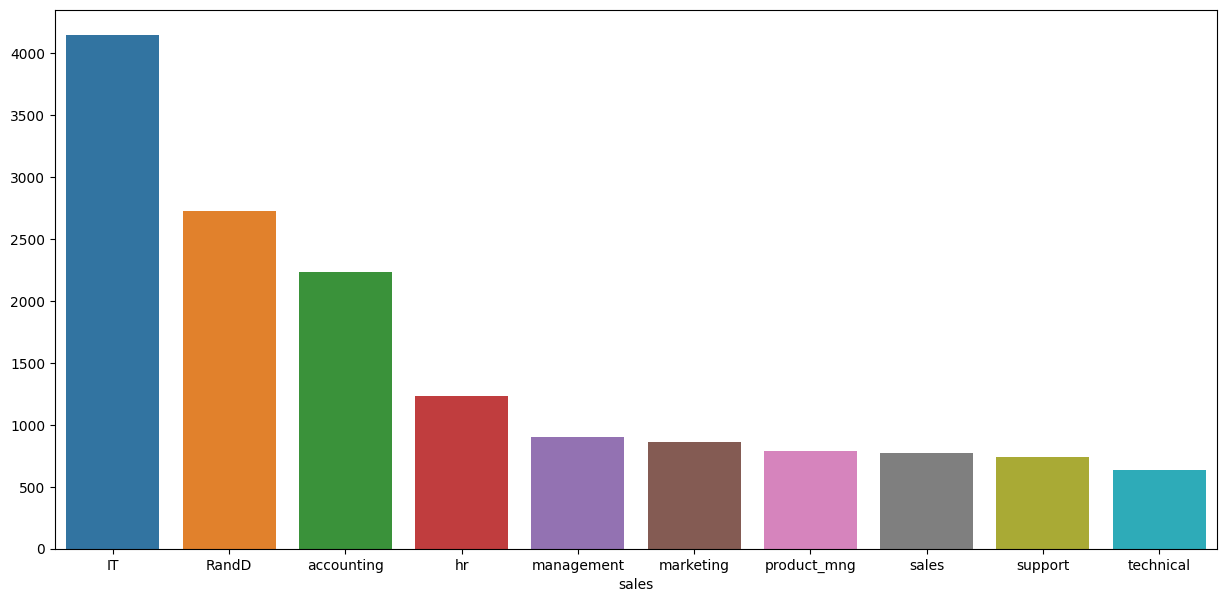

In [43]:
sns.barplot(x=sales_vc.index.levels[0], y=sales_vc)
# plt.xticks(rotation=45)
plt.gcf().set_size_inches((15,7))

<AxesSubplot:ylabel='salary'>

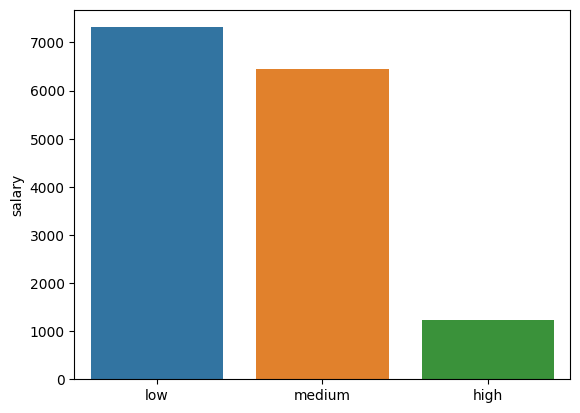

In [6]:
sal_vc = df.salary.value_counts()
sns.barplot(x = sal_vc.index.values, y= sal_vc)

In [7]:
sal_vc

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [54]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [9]:
pt = pd.pivot_table(df, index='sales', columns='salary', aggfunc='count')['Work_accident']

<AxesSubplot:xlabel='sales'>

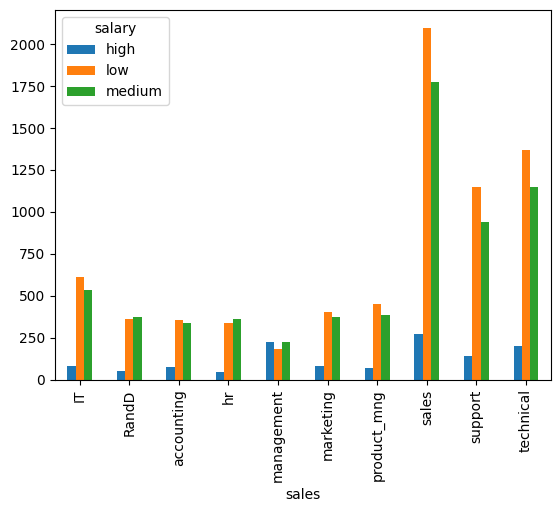

In [65]:
pt.plot.bar()

In [68]:
pt

salary,high,low,medium
sales,,,
IT,83,609,535
RandD,51,364,372
accounting,74,358,335
hr,45,335,359
management,225,180,225
marketing,80,402,376
product_mng,68,451,383
sales,269,2099,1772
support,141,1146,942


In [ ]:
pt.reset_index()

In [91]:
pt.reset_index()

salary,sales,high,low,medium
0,IT,83,609,535
1,RandD,51,364,372
2,accounting,74,358,335
3,hr,45,335,359
4,management,225,180,225
5,marketing,80,402,376
6,product_mng,68,451,383
7,sales,269,2099,1772
8,support,141,1146,942
9,technical,201,1372,1147


<AxesSubplot:xlabel='salary'>

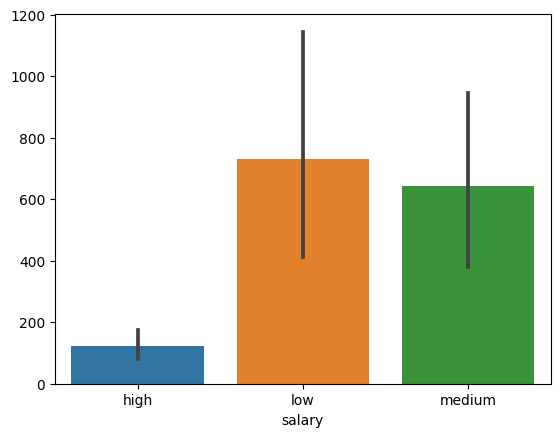

In [90]:
sns.barplot(pt)

In [ ]:
d = {'low' : 1, 'medium' : 2, 'high' : 3}
tdf = df[['sales', 'salary']]
tdf['count'] = tdf['salary'].apply(lambda x: d[x])
tdf


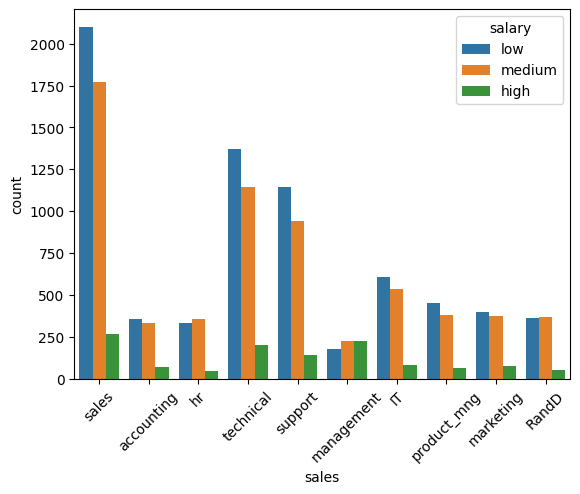

In [97]:
sns.barplot(tdf, x='sales', y='count', hue='salary', estimator='size')
plt.xticks(rotation=45)
pass

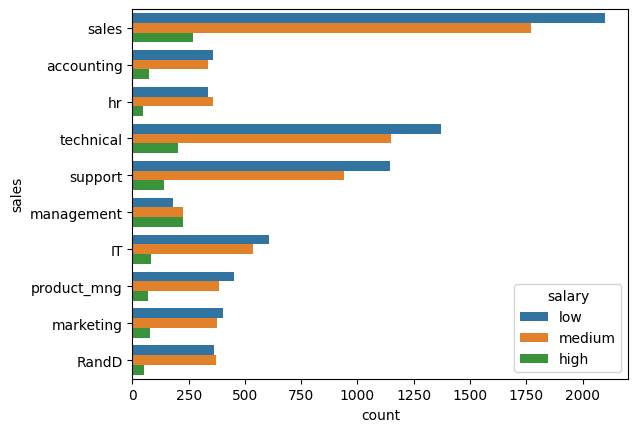

In [99]:
sns.barplot(tdf, y='sales', x='count', hue='salary', estimator='size', orient='h')
pass

10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.

In [100]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [35]:
x = df.drop('left', axis=1)
y = df.left

In [36]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
scaler = MinMaxScaler((-1,1))

x['sales'] = LabelEncoder().fit_transform(x['sales'])
x['salary'] = LabelEncoder().fit_transform(x['salary'])
# x = scaler.fit_transform(x)


In [39]:
x = scaler.fit_transform(x)

In [ ]:
! pip install mlxtend

In [31]:
from mlxtend.plotting import plot_decision_regions

In [41]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
model = LinearDiscriminantAnalysis(solver='eigen').fit(x, y)


In [48]:
from sklearn.metrics import classification_report
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86     11428
           1       0.51      0.26      0.34      3571

    accuracy                           0.76     14999
   macro avg       0.65      0.59      0.60     14999
weighted avg       0.73      0.76      0.73     14999



<AxesSubplot:title={'center':'LDA surface with original features'}>

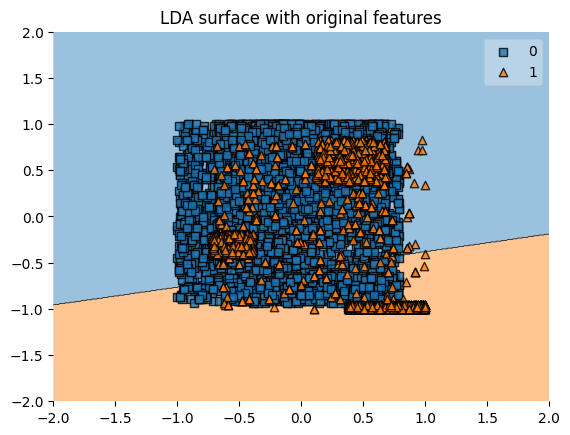

In [45]:
feature_indexes = [3, 0]
sk_lda1 = LinearDiscriminantAnalysis(solver='eigen')
sk_lda1.fit(x[:, feature_indexes], y)
plt.title('LDA surface with original features')
plot_decision_regions(X=x[:, feature_indexes], y=y.to_numpy(), clf=sk_lda1)

<AxesSubplot:title={'center':'LDA surface with original features'}>

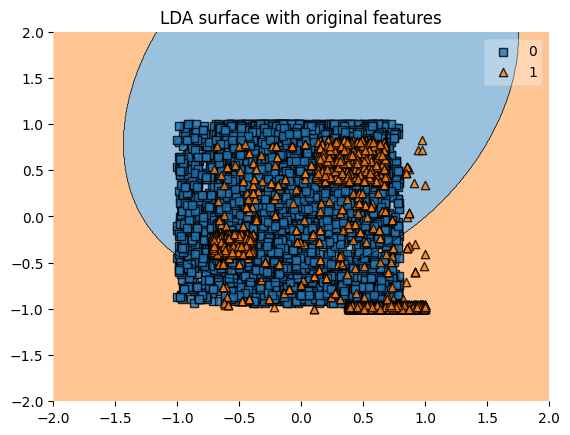

In [44]:
feature_indexes = [3, 0]
sk_lda1 = QuadraticDiscriminantAnalysis()
sk_lda1.fit(x[:, feature_indexes], y)
plt.title('LDA surface with original features')
plot_decision_regions(X=x[:, feature_indexes], y=y.to_numpy(), clf=sk_lda1)

11. Построить модель LDA